In [2]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import re

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
% matplotlib inline

In [4]:
df=pd.read_csv("Data.csv")

In [5]:
df.rename(columns={"Table Name":"tablename","State Code":"statecode","District Code":"distcode","Area Name":"areaname","Total/ Rural/Urban":"tru","Age (in years)":"age","Total - Male":"totalm","Total - Female":"totalf","PSUs - Male":"psum","PSUs - Female":"psuf","Private - Male":"pvtm","Private - Female":"pvtf","Business owners - Male":"bsm","Business owners - Female":"bsf","Zero income - Male":"0m","Zero income - Female":"0f","Other kind of employment - Male":"otherm","Other kind of employment- Female":"otherf"},inplace=True)

In [6]:
df.tru=df.tru.map({"TOTAL":"t","Total":"t","Urban":"u","URBAN":"u","Rural":"r","RURAL":"r"})

In [7]:
df.pivot_table(index=["statecode"])

,0f,0m,bsf,bsm,distcode,otherf,otherm,psuf,psum,pvtf,pvtm,totalf,totalm
statecode,,,,,,,,,,,,,
7,103.200000,76.773333,1986.826667,4453.573333,4.500000,0.000000,0.00000,213.386667,2645.386667,1578.906667,61691.120000,3882.320000,68866.853333
19,1131.691228,522.385965,4634.273684,17375.929825,9.000000,0.000000,0.00000,822.708772,5604.126316,4660.870175,187560.589474,11249.543860,211063.031579
27,622.970370,274.192593,3086.622222,10093.088889,17.500000,0.000000,0.00000,445.570370,3629.511111,3476.281481,122977.755556,7631.444444,136974.548148
29,456.200000,143.495238,2241.619048,9535.019048,13.500000,0.000000,0.00000,431.580952,2522.238095,3308.695238,80219.400000,6438.095238,92420.152381
33,357.367677,116.886869,1479.983838,6262.226263,619.979798,43.058586,18.59596,152.709091,466.729293,1636.896970,40566.076768,3670.016162,47430.515152


In [8]:
sat=df.groupby(["statecode",'areaname',"tru"])[['totalm', 'totalf',
       'psum', 'psuf', 'pvtm', 'pvtf', 'bsm', 'bsf', '0m', '0f', 'otherm',
       'otherf']].sum().reset_index()

In [9]:
sat_d=sat[sat.statecode==7]
sat_w=sat[sat.statecode==19]
sat_m=sat[sat.statecode==27]
sat_k=sat[sat.statecode==29]
sat_t=sat[sat.statecode==33]

In [10]:
sat_d_t=sat_d[sat_d.tru=="t"]

In [11]:
area_name=[]
for i in sat_d_t.areaname:
    area_name.append(re.split(r'\s{2}', i)[0])
area_name
final=[]
for i in area_name:
    final.append(re.split(r'-\s', i)[1])

In [12]:
sat_d_t["areaname"]=final

C:\Users\Archit Umrao\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [13]:
sat_d_t.drop(["otherm","otherf"],axis=1,inplace=True)


C:\Users\Archit Umrao\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [14]:
sat_w_t=sat_w[sat_w.tru=="t"]


In [15]:
area_name=[]
for i in sat_w_t.areaname:
    area_name.append(re.split(r'\s{2}', i)[0])
area_name
wb_area=[]
for i in area_name:
    wb_area.append(re.split(r'\*', i)[0])


In [16]:
final=[]
for i in wb_area:
    final.append(re.split(r'-\s', i)[1])
final

['Bankura',
 'Barddhaman',
 'Birbhum',
 'Dakshin Dinajpur ',
 'Darjiling',
 'Haora',
 'Hugli',
 'Jalpaiguri',
 'Koch Bihar',
 'Kolkata',
 'Maldah',
 'Medinipur',
 'Murshidabad',
 'Nadia',
 'North Twenty Four Parganas',
 'Puruliya',
 'South',
 'Uttar Dinajpur',
 'WEST BENGAL']

In [17]:
sat_w_t["areaname"]=final

C:\Users\Archit Umrao\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [18]:
sat_m_t=sat_m[sat_m.tru=="t"]
sat_m_t.areaname[91]

'District - Akola  (05)'

In [19]:
area_name=[]
for i in sat_m_t.areaname:
    area_name.append(re.split(r'\s{2}', i)[0])


In [20]:
n_area=[]
for i in area_name:
    n_area.append(re.split(r'\s\*', i)[0])


In [21]:
final=[]
for i in n_area:
    final.append(re.split(r'-\s', i)[1])
final

['Ahmadnagar',
 'Akola',
 'Amravati',
 'Aurangabad',
 'Bhandara',
 'Bid',
 'Buldana',
 'Chandrapur',
 'Dhule',
 'Gadchiroli',
 'Gondiya',
 'Hingoli',
 'Jalgaon',
 'Jalna',
 'Kolhapur',
 'Latur',
 'Mumbai',
 'Mumbai (Suburban)',
 'Nagpur',
 'Nanded',
 'Nandurbar',
 'Nashik',
 'Osmanabad',
 'Parbhani',
 'Pune',
 'Raigarh',
 'Ratnagiri',
 'Sangli',
 'Satara',
 'Sindhudurg',
 'Solapur',
 'Thane',
 'Wardha',
 'Washim',
 'Yavatmal',
 'MAHARASHTRA']

In [25]:
sat_m_t["areaname"]=final

C:\Users\Archit Umrao\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [26]:
sat_k_t=sat_k[sat_k.tru=="t"]

In [27]:
area_name=[]
for i in sat_k_t.areaname:
    area_name.append(re.split(r'\s{2}', i)[0])

In [28]:
n_area=[]
for i in area_name:
    n_area.append(re.split(r'\s\*', i)[0])
n_area1=[]
for i in n_area:
    n_area1.append(re.split(r'\*', i)[0])

In [29]:
final=[]
for i in n_area1:
    final.append(re.split(r'-\s', i)[1])
final

['Bagalkot',
 'Bangalore',
 'Bangalore Rural',
 'Belgaum',
 'Bellary',
 'Bidar',
 'Bijapur',
 'Chamarajanagar',
 'Chikmagalur',
 'Chitradurga',
 'Dakshina Kannada',
 'Davanagere',
 'Dharwad',
 'Gadag',
 'Gulbarga',
 'Hassan',
 'Haveri',
 'Kodagu',
 'Kolar',
 'Koppal',
 'Mandya',
 'Mysore',
 'Raichur',
 'Shimoga',
 'Tumkur',
 'Udupi',
 'Uttara Kannada',
 'KARNATAKA']

In [30]:
sat_k_t["areaname"]=final

C:\Users\Archit Umrao\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [56]:
sat_t_t=sat_t[sat_t.tru=="t"]

,statecode,areaname,tru,totalm,totalf,psum,psuf,pvtm,pvtf,bsm,bsf,0m,0f,otherm,otherf
283,33,Ariyalur,t,360246,33658,2554,766,306142,17746,50582,12824,872,2150,96,172
288,33,Coimbatore,t,1799436,112020,22228,5116,1566082,39350,204776,50286,5570,15818,780,1450
292,33,Cuddalore,t,1185398,81684,9616,2178,1024834,36640,148902,37328,1776,4982,270,556
296,33,Dharmapuri,t,704154,46748,5092,1504,615442,21188,81414,17252,1986,6326,220,478
299,33,Dindigul,t,1044394,75150,8164,3388,895970,25184,136704,37766,3118,7836,438,976
306,33,Kanniyakumari,t,873662,91342,8712,4510,739010,50884,123776,28580,1914,6696,250,672
310,33,Karur,t,535276,38266,5346,1072,445724,10714,81500,19774,2478,6224,228,482
313,33,Krishnagiri,t,834986,60074,10050,1866,729110,28780,93444,21614,2164,7320,218,494
319,33,Madurai,t,1485300,102066,11692,4498,1281328,41996,188198,44324,3290,9382,792,1866
323,33,Nagapattinam,t,753272,73132,6600,2118,622742,38230,122132,27396,1564,4750,234,638


In [ ]:
# data cleaned, now visualisation to be done

In [ ]:
#beech mei output karke dekh lena, I have removed the output commands.

In [ ]:
#Next part, Ye uss din ka hai, need to be thought about again.

In [ ]:
for x in sat_d_t['areaname'].unique():
    sat_d_t[sat_d_t['areaname']==x].transpose()

In [38]:
focus=sat_d_t[sat_d_t.areaname=="Central"]
focus

,statecode,areaname,tru,totalm,totalf,psum,psuf,pvtm,pvtf,bsm,bsf,0m,0f


In [39]:
new=pd.DataFrame()
focus.columns
focus.drop(['statecode', 'areaname', 'tru', 'totalm', 'totalf'],axis=1,inplace=True)
focus.columns

C:\Users\Archit Umrao\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Index(['psum', 'psuf', 'pvtm', 'pvtf', 'bsm', 'bsf', '0m', '0f'], dtype='object')

In [22]:
focus.columns
focus['psum']

NameError: name 'focus' is not defined

In [ ]:
tjob=[]
gender=[]

people=[]
for i in focus.columns:
    people.append(focus[i])

for k in [1,2,3,4]:
      for i in ["m","f"]:
            gender.append(i)
            tjob.append(k)

In [42]:
people

[Series([], Name: psum, dtype: int64),
 Series([], Name: psuf, dtype: int64),
 Series([], Name: pvtm, dtype: int64),
 Series([], Name: pvtf, dtype: int64),
 Series([], Name: bsm, dtype: int64),
 Series([], Name: bsf, dtype: int64),
 Series([], Name: 0m, dtype: int64),
 Series([], Name: 0f, dtype: int64)]

In [43]:
new=pd.DataFrame({"gender":gender,"tjob":tjob,"people":people})

In [44]:
new

,gender,people,tjob
0,m,"Series([], Name: psum, dtype: int64)",1
1,f,"Series([], Name: psuf, dtype: int64)",1
2,m,"Series([], Name: pvtm, dtype: int64)",2
3,f,"Series([], Name: pvtf, dtype: int64)",2
4,m,"Series([], Name: bsm, dtype: int64)",3
5,f,"Series([], Name: bsf, dtype: int64)",3
6,m,"Series([], Name: 0m, dtype: int64)",4
7,f,"Series([], Name: 0f, dtype: int64)",4


In [45]:
sns.factorplot("areaname","totalm",data=sat_d_t,size=10)

ValueError: min() arg is an empty sequence

In [46]:
for x in sat_d_t:
    for i in range(0,9):
        newdf["areaname"]=x.columns[1]
        newdf["gender"]    
    
    
    newsatd["areaname"]

AttributeError: 'str' object has no attribute 'columns'

In [47]:
sat_d_t["areaname"]=sat_d_t["areaname"].str.split("-").map(lambda x: x[1])

TypeError: 'float' object is not subscriptable

In [48]:
sat_d_t["areaname"]=sat_d_t["areaname"].str.split("*").map(lambda x: x[0])

TypeError: 'float' object is not subscriptable

In [49]:
sat_d_t["areaname"]=sat_d_t["areaname"].str.split("  ").map(lambda x: x[0])

TypeError: 'float' object is not subscriptable

In [50]:
sat_d_t=sat_d_t[:-1]

In [51]:
sat_d_t.columns

Index(['statecode', 'areaname', 'tru', 'totalm', 'totalf', 'psum', 'psuf',
       'pvtm', 'pvtf', 'bsm', 'bsf', '0m', '0f'],
      dtype='object')

In [52]:
a = ['psum','pvtm', 'bsm', '0m']

sns.factorplot("areaname",a,data=sat_d_t,size=7)

ValueError: cannot copy sequence with size 4 to array axis with dimension 9

In [ ]:
sns.factorplot("")

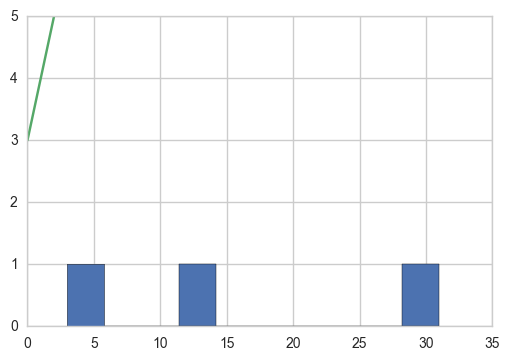

In [53]:
a = [12,3,31]
b = [3,4,5]
plt.hist(a)
plt.plot(b)

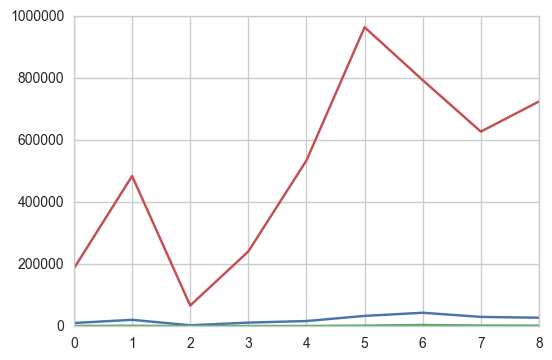

In [54]:
a = []
b = []
c = []
for index,row in sat_d_t.iterrows():
    a.append(row['psum'])
    b.append(row['psuf'])
    c.append(row['pvtm'])
plt.plot(a)
plt.plot(b)
plt.plot(c)